In [1]:
# importing all required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
import warnings
import imblearn 


In [2]:
# to ignore warnings while running the code 
warnings.filterwarnings("ignore")

## step 1 - Load the Data 

In [3]:
# loading data into dataframe
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 
print("Shape:", df.shape)

print("Columns:", df.columns)

df.head()

Shape: (7043, 21)
Columns: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Step 2 - Exploratory Data Analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# finding irregularities in the data
def irregularities(data):
    for i in data:
        print('*'*20, i, '*'*20)
        print(data[i].unique())
        print()

irregularities(df)

******************** customerID ********************
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

******************** gender ********************
['Female' 'Male']

******************** SeniorCitizen ********************
[0 1]

******************** Partner ********************
['Yes' 'No']

******************** Dependents ********************
['No' 'Yes']

******************** tenure ********************
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

******************** PhoneService ********************
['No' 'Yes']

******************** MultipleLines ********************
['No phone service' 'No' 'Yes']

******************** InternetService ********************
['DSL' 'Fiber optic' 'No']

******************** OnlineSecurity ********************
['No' 'Yes' 'No internet

## observation_1 : there are no irregularities in the data 

## observation_2 : changing datatypes 

- Total charges - Float
- Senior citizen - Object

In [6]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

## Why error ?

In [7]:
# beacuse of spaces 

# Replace blank spaces with NaN
import pandas as pd
import numpy as np



# Replace blank spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert the column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# median imputing
df['TotalCharges'].fillna(1397, inplace=True)

# Check the result
print(df['TotalCharges'].head())



0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64


## observation : Dataset is having missing values . but we cannot see them in df.info() due to wrong datatype and after typecasting we got see empty string . So we have to replace the empty string's with median Imputer 

In [8]:
# recheck
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Target Variable - 'churn'

<Axes: >

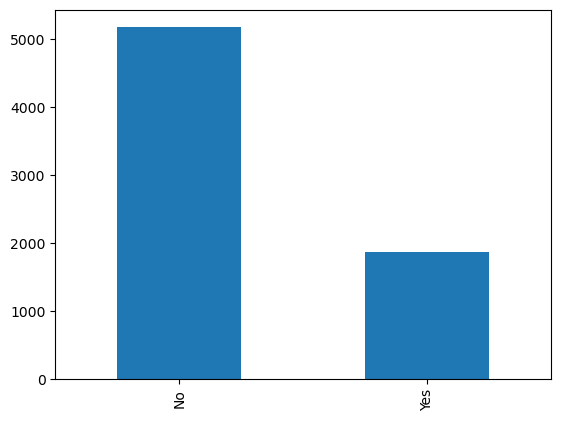

In [9]:
df['Churn'].value_counts().plot(kind='bar')

## Observation_4: looks like dataset is having Imbalance for Yes class
 solution : we need to apply over sampling for YES class using SMOTE  

## Univariate  Non Visual statistical Analysis 

In [10]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [11]:

def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [12]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [13]:
discrete_univariate_analysis(discrete_df)

********** customerID **********
count                                                   7043
nunique                                                 7043
unique     [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
Name: customerID, dtype: object
Value Counts: 
 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

********** gender **********
count                7043
nunique                 2
unique     [Female, Male]
Name: gender, dtype: object
Value Counts: 
 Male      3555
Female    3488
Name: gender, dtype: int64

********** SeniorCitizen **********
count        7043
nunique         2
unique     [0, 1]
Name: SeniorCitizen, dtype: object
Value Counts: 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64

********** Partner **********
count           7043
nunique            2
unique     [Yes, No]
Name: Partner, d

In [14]:
numerical_univariate_analysis(numerical_df)

********** tenure **********
count     7043.000000
min          0.000000
max         72.000000
mean        32.371149
median      29.000000
std         24.559481
skew         0.239540
Name: tenure, dtype: float64

********** MonthlyCharges **********
count     7043.000000
min         18.250000
max        118.750000
mean        64.761692
median      70.350000
std         30.090047
skew        -0.220524
Name: MonthlyCharges, dtype: float64

********** TotalCharges **********
count     7043.000000
min         18.800000
max       8684.800000
mean      2281.916186
median    1397.000000
std       2265.270688
skew         0.963790
Name: TotalCharges, dtype: float64



## Bivariate - Non Visual Statistical Analysis

In [15]:

# num vs num

numerical_df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650865
TotalCharges,0.825464,0.650865,1.000000


## Bivariate - visual analysis 

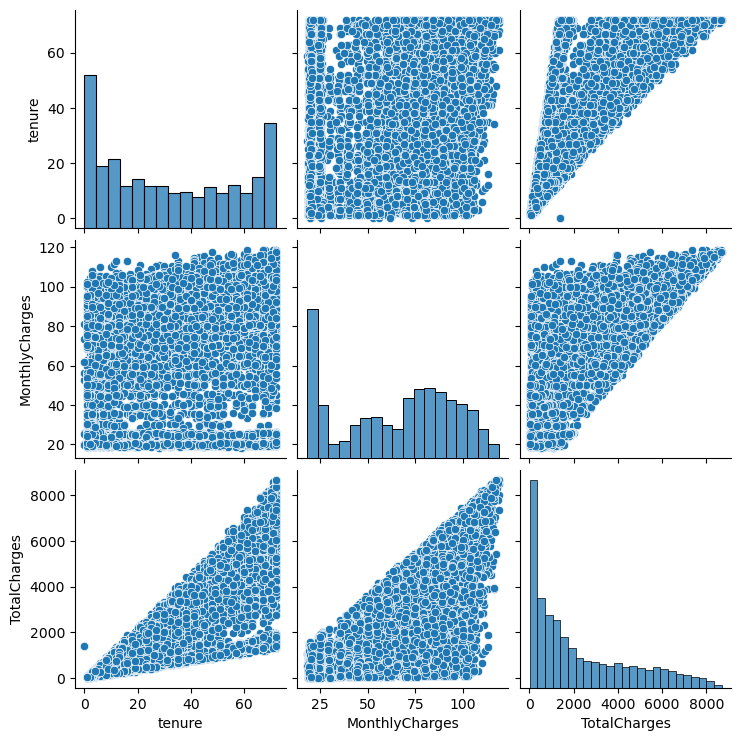

In [16]:
sns.pairplot(df)

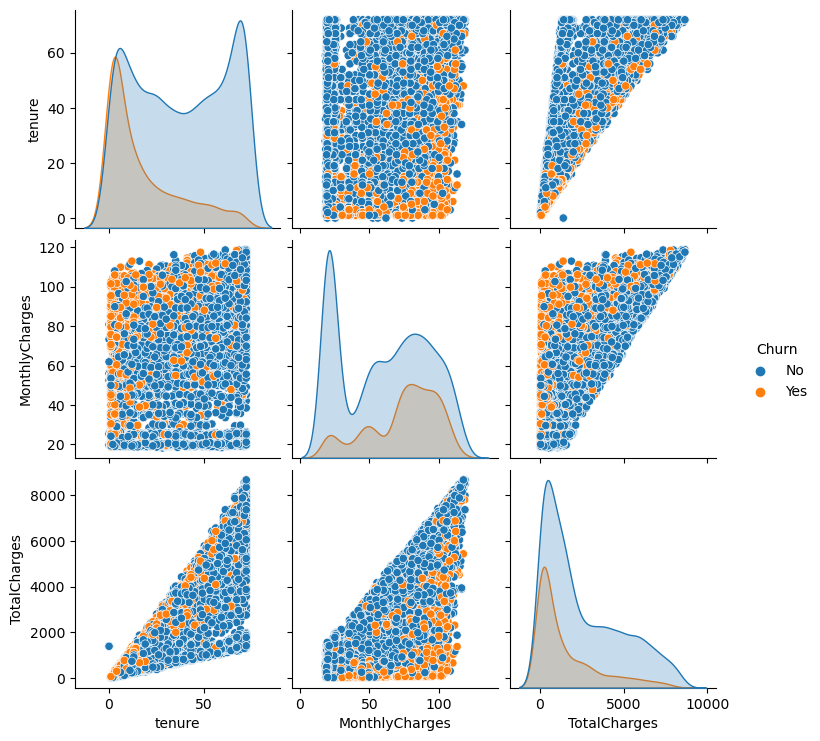

In [17]:
sns.pairplot(df,hue='Churn')

## Univariate Analysis - visual (outlier detection)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='MonthlyCharges'>

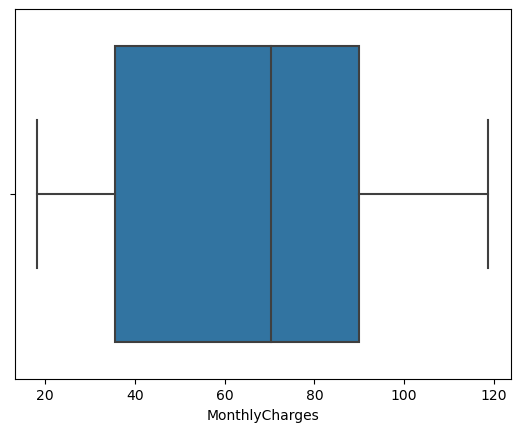

In [19]:
sns.boxplot(data=df, x="MonthlyCharges")


<Axes: xlabel='tenure'>

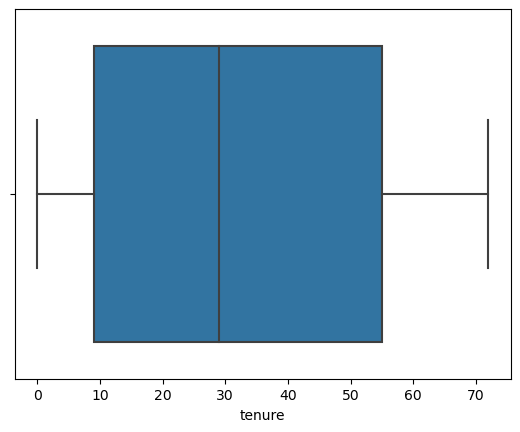

In [20]:
sns.boxplot(data=df, x="tenure")

<Axes: xlabel='TotalCharges'>

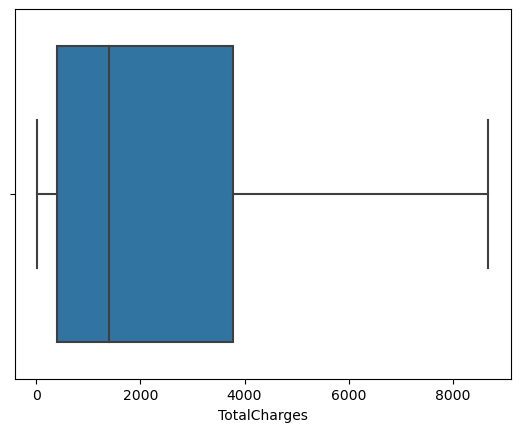

In [21]:
sns.boxplot(data=df, x ="TotalCharges")

## Observation 5: there are no outliers in the data 

In [22]:
# checking for duplicate values 
duplicate = df[df.duplicated()]

In [23]:
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Observation 6 : there are no duplicates in the data

## ML PIPELINE 

## Step 3 - Identify Input and Output

In [24]:
X = df.drop(columns=['Churn','customerID']) # while training model we drop custumerID
y = df['Churn']

## Step 4 - Split the data into Train and Test

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


## STEP - 5 : DATA PREPARATION FOR X_TRAIN

In [27]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

In [28]:
X_train_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3296,Female,0,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic)
6397,Male,1,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic)
6043,Male,0,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check
5309,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
3000,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [29]:
X_train_num.head()

,tenure,MonthlyCharges,TotalCharges
3296,24,49.30,1233.25
6397,54,65.25,3529.95
6043,3,40.15,130.75
5309,61,20.25,1278.80
3000,12,84.45,1059.55


In [30]:
# num transformation of categorical data 
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)
X_train_cat_tansformed.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [31]:
# to remove the scale difference 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
3296,-0.340191,-0.514314,-0.461523
6397,0.883210,0.017840,0.555935
6043,-1.196572,-0.819594,-0.949940
5309,1.168670,-1.483535,-0.441344
3000,-0.829552,0.658427,-0.538473


In [32]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,-0.340191,-0.514314,-0.461523,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,0.883210,0.017840,0.555935,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6043,-1.196572,-0.819594,-0.949940,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,1.168670,-1.483535,-0.441344,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3000,-0.829552,0.658427,-0.538473,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


##  Step 6 - Applying SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)


## Step 7 - DATA PREPARATION FOR TEST DATA

In [34]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64','float64'])

In [35]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,tenure,MonthlyCharges,TotalCharges
2200,-0.544091,-0.217375,-0.544808
4627,1.127890,1.731076,2.115126
3225,-0.788772,0.241378,-0.598590
2828,-1.278132,-1.476862,-0.998804
3768,0.923990,0.434889,0.882189


In [37]:
X_test_cat_tansformed = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_test_cat.index)
X_test_cat_tansformed.head()

,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3225,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2828,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3768,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [38]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,-0.544091,-0.217375,-0.544808,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4627,1.127890,1.731076,2.115126,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3225,-0.788772,0.241378,-0.598590,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2828,-1.278132,-1.476862,-0.998804,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3768,0.923990,0.434889,0.882189,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [46]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# KNN

In [48]:
tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2, 3]}]

clf = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'p': [1, 2, 3]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [49]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

knn_pred = clf.best_estimator_.predict(X_test_transformed)
knn_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ', knn_model)

Best parameters set found on train set
{'n_neighbors': 1, 'p': 1}
KNeighborsClassifier(n_neighbors=1, p=1)

Score on Test Data:  0.7103918228279387


In [50]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['KNN classifier Predictions'] = knn_pred

output_df

,Actual,KNN classifier Predictions
2200,No,No
4627,No,No
3225,No,Yes
2828,No,No
3768,No,No
...,...,...
3184,No,No
2551,No,Yes
5735,No,No
5096,No,No


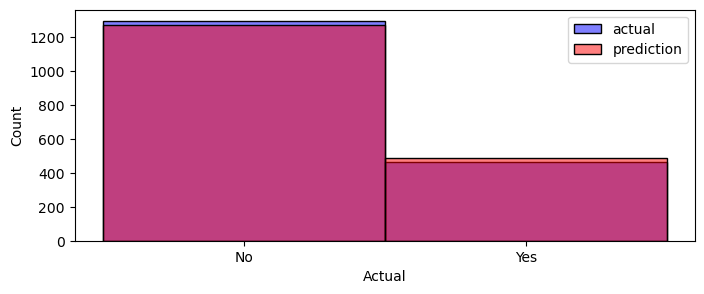

In [51]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN classifier Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [54]:
tuned_parameters = [{'penalty': ['l1', 'l2','l1+l2']}]

clf = GridSearchCV(
    estimator=LogisticRegression(max_iter=5000), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_smote,y_train_smote )

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid=[{'penalty': ['l1', 'l2', 'l1+l2']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [55]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

lg_pred = clf.best_estimator_.predict(X_test_transformed)
lg_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ', lg_model)

Best parameters set found on train set
{'penalty': 'l2'}
LogisticRegression(max_iter=5000)

Score on Test Data:  0.7450312322544009


In [56]:
output_df = pd.DataFrame({'Actual': y_test})
output_df['Logistic Regression Predictions'] = lg_pred

output_df

,Actual,Logistic Regression Predictions
2200,No,No
4627,No,No
3225,No,Yes
2828,No,No
3768,No,No
...,...,...
3184,No,No
2551,No,No
5735,No,No
5096,No,No


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
tuned_parameters = [{'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}]

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [5, 10, 15],
                          'min_samples_split': [2, 5, 10]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [63]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
print()

dt_pred = clf.best_estimator_.predict(X_test_transformed)
dt_model = clf.score(X_test_transformed, y_test)

print('Score on Test Data: ',dt_model )

Best parameters set found on train set
{'max_depth': 15, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=15)

Score on Test Data:  0.7262918796138558


## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
tuned_parameters = [{'n_estimators': [50, 100, 200], 'max_depth': [5, 10]}]

clf_1 = GridSearchCV(
    estimator=RandomForestClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf_1.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='accuracy', verbose=1)

Best parameters set found on train set
{'max_depth': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=10)

Score on Test Data:  0.7734241908006815


## saving the trained model into file

In [67]:
import joblib

In [70]:
joblib.dump(clf_1, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [72]:
# Load the saved model from file
loaded_model = joblib.load('random_forest_model.pkl')